### Portfolios

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files


In [2]:
def upload_files(filename: str):
    """
    Upload files to colab runtime
    """
    print(f"uploading....{filename}....")
    files.upload()

    if not os.path.isfile(filename):
        print(f"{filename} does not exist,,, try uploading it mannually")
        exit()


In [11]:
tickers = ["FB", "NVDA", "AMZN", "HP", "AAPL"]

df_list = []
for ticker in tickers:
    fname = f"ticker-{ticker.lower()}.csv"
    upload_files(fname)
    df = pd.read_csv(fname, index_col=0, parse_dates=True)
    df_list.append(df['Adj Close'])

data = pd.concat(df_list, axis=1)
data.columns = tickers

uploading....ticker-fb.csv....


uploading....ticker-nvda.csv....


uploading....ticker-amzn.csv....


uploading....ticker-hp.csv....


uploading....ticker-aapl.csv....


In [12]:
data.head()

,FB,NVDA,AMZN,HP,AAPL
Date,,,,,
2018-01-02,181.419998,NaN,1189.010010,NaN,41.442081
2018-01-03,184.669998,NaN,1204.199951,NaN,41.434864
2018-01-04,184.330002,NaN,1209.589966,NaN,41.627323
2018-01-05,186.850006,NaN,1229.140015,NaN,42.101261
2018-01-08,188.279999,NaN,1246.869995,NaN,41.944889


In [16]:
data['NVDA'].fillna(data['NVDA'].mean(), inplace=True)

In [17]:
data['HP'].fillna(data['HP'].mean(), inplace=True)

In [18]:
data.head()

,FB,NVDA,AMZN,HP,AAPL
Date,,,,,
2018-01-02,181.419998,395.383287,1189.010010,21.794104,41.442081
2018-01-03,184.669998,395.383287,1204.199951,21.794104,41.434864
2018-01-04,184.330002,395.383287,1209.589966,21.794104,41.627323
2018-01-05,186.850006,395.383287,1229.140015,21.794104,42.101261
2018-01-08,188.279999,395.383287,1246.869995,21.794104,41.944889


In [19]:
data = data / data.iloc[0]

In [20]:
data.head()

,FB,NVDA,AMZN,HP,AAPL
Date,,,,,
2018-01-02,1.000000,1.0,1.000000,1.0,1.000000
2018-01-03,1.017914,1.0,1.012775,1.0,0.999826
2018-01-04,1.016040,1.0,1.017308,1.0,1.004470
2018-01-05,1.029931,1.0,1.033751,1.0,1.015906
2018-01-08,1.037813,1.0,1.048662,1.0,1.012133


In [21]:
data.tail()

,FB,NVDA,AMZN,HP,AAPL
Date,,,,,
2020-12-24,1.473928,1.314547,2.668346,1.110392,3.184444
2020-12-28,1.526844,1.305063,2.761928,1.086532,3.298338
2020-12-29,1.525631,1.309438,2.793921,1.077814,3.254421
2020-12-30,1.498567,1.329925,2.763518,1.081944,3.226672
2020-12-31,1.505677,1.320744,2.739195,1.062673,3.201818


In [24]:
portfolio = np.array([.2, .15, .25, .20, .20])

In [25]:
np.sum(portfolio)

1.0

In [27]:
(data*portfolio*100000).head()

,FB,NVDA,AMZN,HP,AAPL
Date,,,,,
2018-01-02,20000.000000,15000.0,25000.000000,20000.0,20000.000000
2018-01-03,20358.284647,15000.0,25319.382118,20000.0,19996.516870
2018-01-04,20320.802965,15000.0,25432.712002,20000.0,20089.397874
2018-01-05,20598.611839,15000.0,25843.769282,20000.0,20318.120936
2018-01-08,20756.256276,15000.0,26216.557995,20000.0,20242.655581


In [28]:
(data*portfolio*100000).tail()

,FB,NVDA,AMZN,HP,AAPL
Date,,,,,
2020-12-24,29478.557667,19718.208282,66708.646591,22207.841360,63688.886561
2020-12-28,30536.876066,19575.941267,69048.198374,21730.647670,65966.765015
2020-12-29,30512.622817,19641.573042,69848.024254,21556.288100,65088.427219
2020-12-30,29971.336993,19948.871184,69087.940191,21638.879383,64533.438735
2020-12-31,30113.549379,19811.156528,68479.867808,21253.453979,64036.360045


In [30]:
(np.sum(data*portfolio*100000, axis=1)).head()

Date
2018-01-02    100000.000000
2018-01-03    100674.183635
2018-01-04    100842.912840
2018-01-05    101760.502057
2018-01-08    102215.469852
dtype: float64

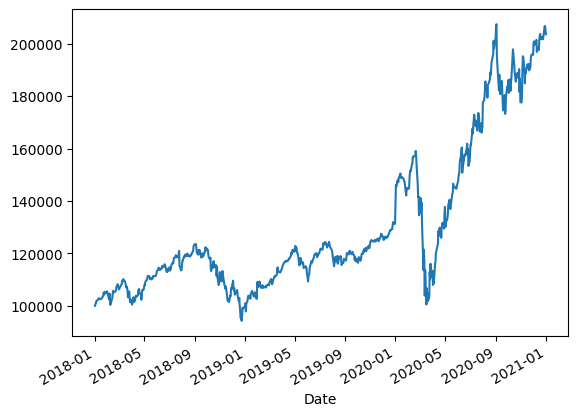

In [31]:
fig, ax = plt.subplots()
np.sum(data*portfolio*100000, axis=1).plot(ax=ax);

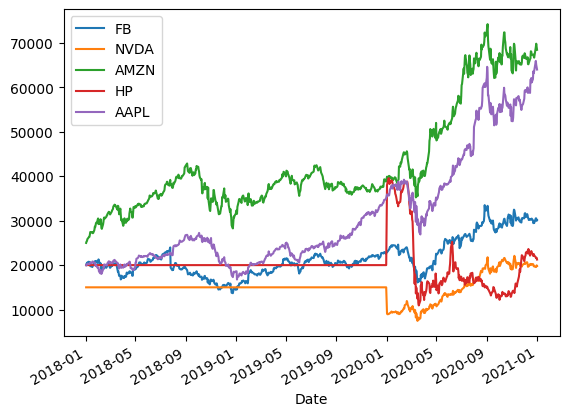

In [34]:
fig, ax = plt.subplots()
(data*portfolio*100000).plot(ax=ax);

### Sharpe Ratio

* Developeed by William F. Sharpe
* Represent both the risk and return
* Understands return of investment compared to risk


SR = (R(p) - R(f)) / sigma (p)
* SR = Sharpe ratio
* Rp return of portfolio
* Rf: Risk free return
* Sigma p: standard deviation of portfolio

Goal is to get the higher value of SR

In [35]:
tickers = ["FB", "NVDA", "AMZN", "HP", "AAPL"]

df_list = []
for ticker in tickers:
    fname = f"ticker-{ticker.lower()}.csv"
    df = pd.read_csv(fname, index_col=0, parse_dates=True)
    df_list.append(df['Adj Close'])

data = pd.concat(df_list, axis=1)
data.columns = tickers

In [36]:
data.head()

,FB,NVDA,AMZN,HP,AAPL
Date,,,,,
2018-01-02,181.419998,NaN,1189.010010,NaN,41.442081
2018-01-03,184.669998,NaN,1204.199951,NaN,41.434864
2018-01-04,184.330002,NaN,1209.589966,NaN,41.627323
2018-01-05,186.850006,NaN,1229.140015,NaN,42.101261
2018-01-08,188.279999,NaN,1246.869995,NaN,41.944889


In [39]:
portfolio = np.array([.2, .15, .3, .1, .25])

In [41]:
data = data / data.iloc[0]

In [42]:
data.head()

,FB,NVDA,AMZN,HP,AAPL
Date,,,,,
2018-01-02,1.000000,NaN,1.000000,NaN,1.000000
2018-01-03,1.017914,NaN,1.012775,NaN,0.999826
2018-01-04,1.016040,NaN,1.017308,NaN,1.004470
2018-01-05,1.029931,NaN,1.033751,NaN,1.015906
2018-01-08,1.037813,NaN,1.048662,NaN,1.012133


In [43]:
data['Log Return'] = np.sum(np.log(data/ data.shift()) * portfolio, axis=1)

In [44]:
data.head()

,FB,NVDA,AMZN,HP,AAPL,Log Return
Date,,,,,,
2018-01-02,1.000000,NaN,1.000000,NaN,1.000000,0.000000
2018-01-03,1.017914,NaN,1.012775,NaN,0.999826,0.007316
2018-01-04,1.016040,NaN,1.017308,NaN,1.004470,0.002130
2018-01-05,1.029931,NaN,1.033751,NaN,1.015906,0.010356
2018-01-08,1.037813,NaN,1.048662,NaN,1.012133,0.004891


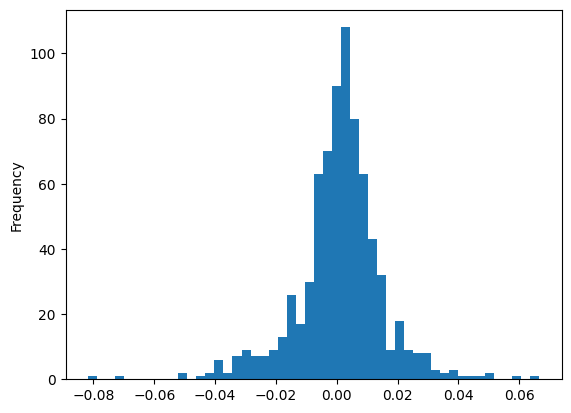

In [45]:
fig, ax = plt.subplots()
data['Log Return'].plot(kind='hist', bins=50, ax=ax);

In [46]:
SR = data['Log Return'].mean() / data['Log Return'].std()

In [47]:
SR

0.061585206989653286

In [48]:
ASR = SR * 252 ** 0.5

In [49]:
ASR

0.9776348528103562

In [50]:
(data['Log Return'].mean()*252) / (data['Log Return'].std()*252**0.5)

0.9776348528103562

### Monte Carlo Simulation

* Solve problems having a probabilistics interpretation
* Model the probability of different outcomes
* Understand impact of risk and uncertainity


### Efficient Frontier
* Expected returns vs Expected volatility

In [53]:
def roll_dice():
  return np.sum(np.random.randint(1, 7, 2))

In [63]:
def monte_carlo_simulation(runs=1000):
    result = np.zeros(2)
    for _ in range(runs):
        if roll_dice() == 7:
            result[0] += 1
        else:
            result[1] += 1
    return result /runs

In [69]:
r = monte_carlo_simulation()
r

array([0.145, 0.855])

In [71]:
d1 = np.arange(1, 7)
d2 = np.arange(1, 7)

In [72]:
mat = np.add.outer(d1, d2)

In [73]:
mat

array([[ 2,  3,  4,  5,  6,  7],
       [ 3,  4,  5,  6,  7,  8],
       [ 4,  5,  6,  7,  8,  9],
       [ 5,  6,  7,  8,  9, 10],
       [ 6,  7,  8,  9, 10, 11],
       [ 7,  8,  9, 10, 11, 12]])

In [74]:
mat.shape

(6, 6)

In [75]:
mat.size

36

In [76]:
mat[mat == 7].size

6

In [77]:
mat[mat == 7].size / mat.size

0.16666666666666666

In [78]:
mat[mat != 7].size / mat.size

0.8333333333333334

In [80]:
results = np.zeros(1000)

for i in range(1000):
    results[i] = monte_carlo_simulation()[0]

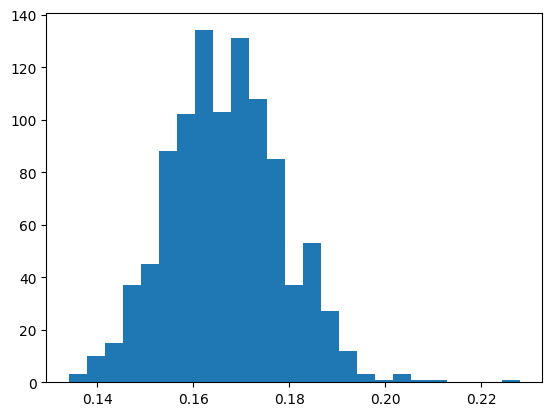

In [84]:
fig, ax = plt.subplots()
ax.hist(results, bins=25);

In [82]:
!free -h

               total        used        free      shared  buff/cache   available
Mem:            12Gi       1.2Gi       8.5Gi        39Mi       3.0Gi        11Gi
Swap:             0B          0B          0B


In [85]:
tickers = ["FB", "NVDA", "AMZN", "HP", "AAPL"]

df_list = []
for ticker in tickers:
    fname = f"ticker-{ticker.lower()}.csv"
    df = pd.read_csv(fname, index_col=0, parse_dates=True)
    df_list.append(df['Adj Close'])

data = pd.concat(df_list, axis=1)
data.columns = tickers

In [87]:
log_return = np.log(data/data.shift())

In [88]:
log_return.head()

,FB,NVDA,AMZN,HP,AAPL
Date,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN
2018-01-03,0.017756,NaN,0.012694,NaN,-0.000174
2018-01-04,-0.001843,NaN,0.004466,NaN,0.004634
2018-01-05,0.013579,NaN,0.016033,NaN,0.011321
2018-01-08,0.007624,NaN,0.014322,NaN,-0.003721


In [102]:
log_return.mean().shape

(5,)

In [110]:
weight = np.random.random(5)
weight /= np.sum(weight)

In [111]:
weight.shape

(5,)

In [112]:
exp_return = np.sum(log_return.mean()*weight)*252

In [113]:
exp_volatility = np.sqrt(np.dot(weight.T, np.dot(log_return.cov()*252, weight)))

In [114]:
sharpe_ratio = exp_return / exp_volatility

In [115]:
sharpe_ratio

0.5251284319509458

In [124]:
# Monte Carlo Simulation
n = 5000

weights = np.zeros((n, 5))
exp_returns = np.zeros(n)
exp_volatilities = np.zeros(n)
sharpe_ratios = np.zeros(n)

for i in range(n):
    weight = np.random.random(5)
    weight /= np.sum(weight)
    weights[i] = weight

    exp_returns[i] = np.sum(log_return.mean()*weight)*252
    exp_volatilities[i] = np.sqrt(np.dot(weight.T, np.dot(log_return.cov()*252, weight)))
    sharpe_ratios[i] = exp_returns[i] / exp_volatilities[i]


In [125]:
sharpe_ratios.max()

1.2308614567464065

In [126]:
sharpe_ratio.argmax()

0

In [127]:
weights[0]

array([0.24491428, 0.36192669, 0.05532529, 0.04741551, 0.29041823])

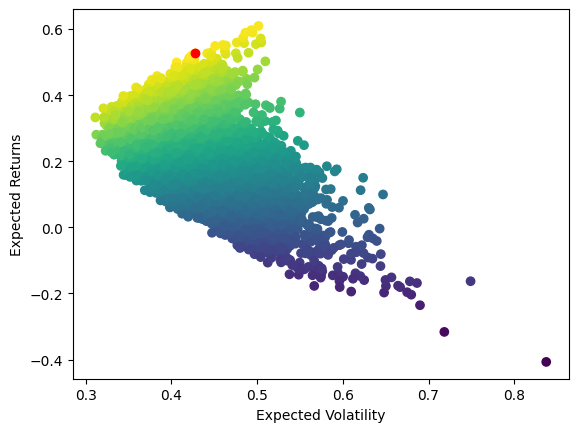

In [130]:
fig, ax = plt.subplots()
ax.scatter(exp_volatilities, exp_returns, c=sharpe_ratios)
ax.scatter(exp_volatilities[sharpe_ratios.argmax()], exp_returns[sharpe_ratios.argmax()], c='r')
ax.set_xlabel("Expected Volatility")
ax.set_ylabel("Expected Returns");

In [148]:
tickers = ["FB", "AMZN"]

df_list = []
for ticker in tickers:
    fname = f"ticker-{ticker.lower()}.csv"
    df = pd.read_csv(fname, index_col=0, parse_dates=True)
    df_list.append(df['Adj Close'])

data = pd.concat(df_list, axis=1)
data.columns = tickers

In [149]:
log_return = np.log(data / data.shift())

In [157]:
n = 1000

weights = np.zeros((n, 2))
returns = np.zeros(n)
volatilities = np.zeros(n)

for i in range(n):
    weight = np.random.random(2)
    weight /= np.sum(weight)
    weights[i] = weight

    returns[i] = np.sum(weight * log_return.mean() * 252)
    volatilities[i] = np.sqrt(np.dot(weight.T, np.dot(log_return.cov() *252, weight )))

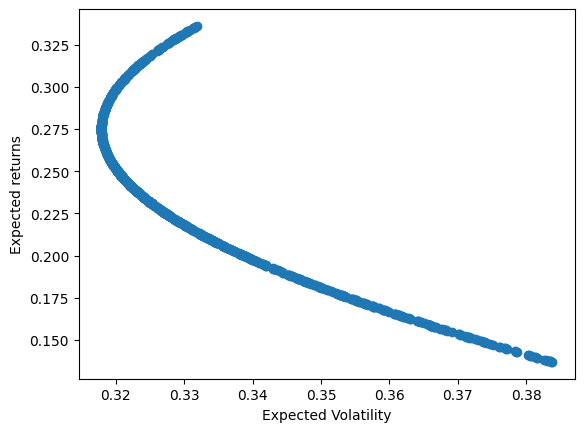

In [160]:
fig, ax = plt.subplots()
ax.scatter(volatilities, returns)
ax.set_xlabel('Expected Volatility')
ax.set_ylabel('Expected returns');

In [146]:
volatilities.argmax()

0

In [147]:
volatilities.argmin()

0